## 练习1
- 并列显示两张子图
- 第一张为 dog.jpg 原图灰度图
- 第二张为 dog.jpg 灰度图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布

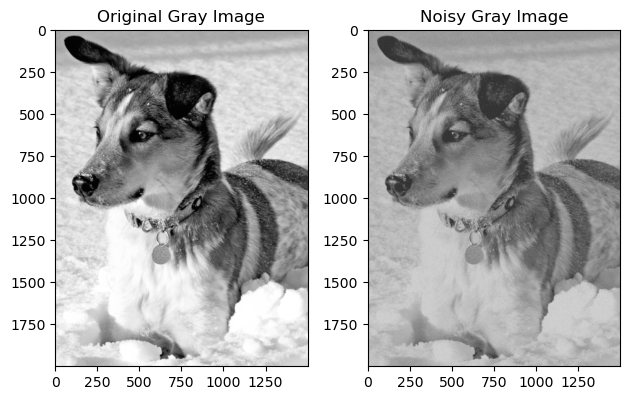

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 读取原图
img = cv2.imread('dog.jpg')
# 将原图转换为灰度图
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 生成符合标准正太分布的噪声
mean = 0
stddev = 20
noise = np.random.normal(mean, stddev, gray_img.shape)

# 将噪声添加到灰度图中
noisy_gray_img = gray_img + noise

# 显示原图和添加噪声后的图像
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Gray Image')

plt.subplot(1,2,2)
plt.imshow(noisy_gray_img, cmap='gray')
plt.title('Noisy Gray Image')
plt.tight_layout()

plt.show()

## 练习2
- 计算`dog.jpg`的三个通道的
    - max 最大值
    - min 最小值
    - mean 平均值
    - std 标准差
    - 25% 分位数
    - 50% 分位数
    - 70% 分位数
- 请使用`tabulate`[[链接](https://zzutai.wolai.com/5Gn4c94kEfpWBekczG5gZ)]实现以下效果
```txt
+------+--------------------+--------------------+--------------------+
| meta | R                  | G                  | B                  |
+------+--------------------+--------------------+--------------------+
| max  | 255                | 255                | 255                |
+------+--------------------+--------------------+--------------------+
| min  | 0                  | 0                  | 0                  |
+------+--------------------+--------------------+--------------------+
| mean | 181.421051         | 169.47528066666666 | 151.87428366666666 |
+------+--------------------+--------------------+--------------------+
| std  | 61.430459500391734 | 69.71584693328025  | 83.18132740623544  |
+------+--------------------+--------------------+--------------------+
| 25%  | 144.0              | 121.0              | 79.0               |
+------+--------------------+--------------------+--------------------+
| 50%  | 198.0              | 192.0              | 189.0              |
+------+--------------------+--------------------+--------------------+
| 75%  | 228.0              | 224.0              | 222.0              |
+------+--------------------+--------------------+--------------------+
```

In [38]:
import cv2
import numpy as np
from tabulate import tabulate

# 读取图像
img = cv2.imread("dog.jpg")

# 分离通道
b, g, r = cv2.split(img)

# 计算每个通道的统计量
stats = [['max', np.max], ['min', np.min], ['mean', np.mean], ['std', np.std],
         ['25%', np.percentile], ['50%', np.percentile], ['75%', np.percentile]]

data = [['meta', 'R', 'G', 'B']]
for stat, func in stats:
    row = [stat]
    for channel in (r, g, b):
        if func == np.percentile:
            val = func(channel, int(stat[:-1]))
        else:
            val = func(channel)
        row.append(val)
    data.append(row)

# 输出表格
print(tabulate(data, tablefmt='grid'))

+------+-------------------+--------------------+--------------------+
| meta | R                 | G                  | B                  |
+------+-------------------+--------------------+--------------------+
| max  | 255               | 255                | 255                |
+------+-------------------+--------------------+--------------------+
| min  | 0                 | 0                  | 0                  |
+------+-------------------+--------------------+--------------------+
| mean | 181.421051        | 169.47528066666666 | 151.87428366666666 |
+------+-------------------+--------------------+--------------------+
| std  | 61.43045950006179 | 69.71584693325634  | 83.18132740627671  |
+------+-------------------+--------------------+--------------------+
| 25%  | 144.0             | 121.0              | 79.0               |
+------+-------------------+--------------------+--------------------+
| 50%  | 198.0             | 192.0              | 189.0              |
+-----

## 练习3
- 并列显示两张子图
- 第一张为 dog.jpg 原图RGB图
- 第二张为 dog.jpg 灰度图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布
- 注意: 有可能需要对加上噪音的彩图进行极小极大值归一 [[链接](https://zzutai.wolai.com/23rRgaWcBJif4xw1Tww3kt)] ，否则会超出可视范围导致图像显示不正常

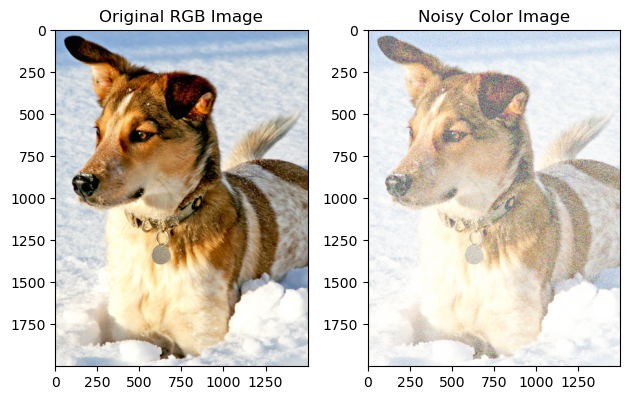

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取原始图像
img = cv2.imread('dog.jpg')

# 添加噪音
mean = 0
stddev = 20
noise = np.random.normal(mean, stddev, img.shape)
noisy_img = cv2.add(img, noise.astype(np.uint8))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 对彩色图像进行极小极大值归一
min_value = np.min(noisy_img)
max_value = np.max(noisy_img)
normalized_img = (noisy_img - min_value) / (max_value - min_value)

# 获取图像的 RGB 三个通道
b, g, r = cv2.split(normalized_img)

# 显示原始图像和添加噪音后的彩色图像
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img[:, :, ::-1])
plt.title('Noisy Color Image')
plt.tight_layout()
plt.show()

## 练习4
- 显示3行子图
- 第一行：`dog.jpg`RGB原图、第二行图合成RGB图，第三行图合成RGB图
- 第二行：R、G、B三通道彩图
- 第三行：R、G、B单通道灰度图

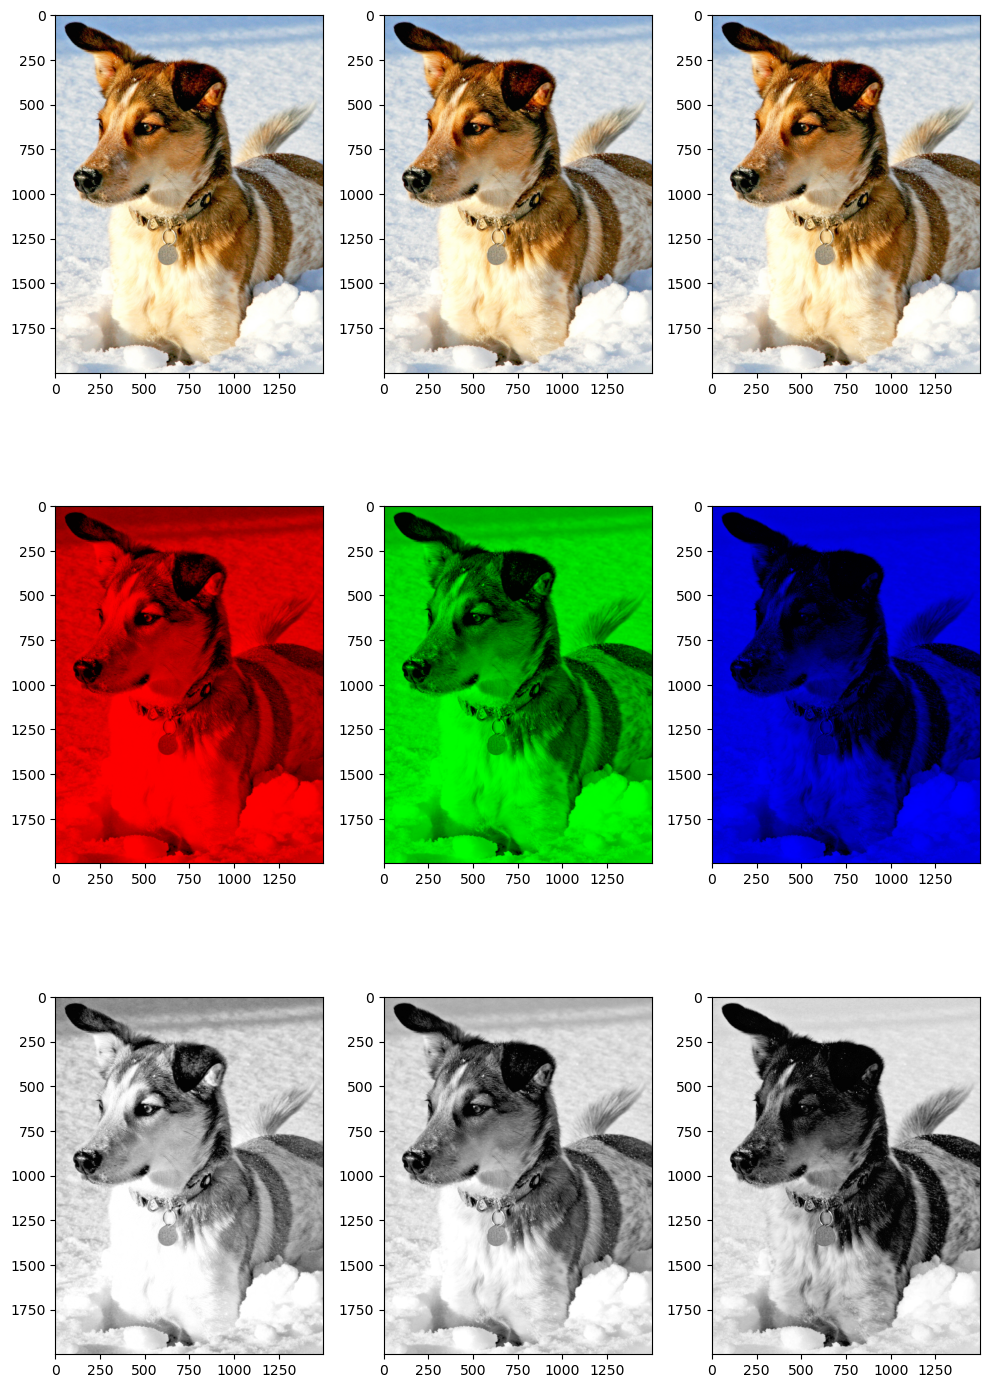

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取原始彩色图像
img_bgr = cv2.imread('dog.jpg', 1)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 提取 R、G、B 三通道图像
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# 合成 RGB 图像
RGB_stack = np.stack((R, G, B), axis=2)
RGB_concat = np.concatenate((R[..., np.newaxis], G[..., np.newaxis], B[..., np.newaxis]), axis=2)

# 提取 R、G、B 单通道图像
img_r, img_g, img_b = R[..., np.newaxis] * np.array([1, 0, 0]), \
                       G[..., np.newaxis] * np.array([0, 1, 0]), \
                       B[..., np.newaxis] * np.array([0, 0, 1])

# 合成 RGB 单通道图像
img_gr, img_gg, img_gb = img @ np.array([1, 0, 0]), \
                         img @ np.array([0, 1, 0]), \
                         img @ np.array([0, 0, 1])

# 显示图像
fig, axs = plt.subplots(3, 3, figsize=(10, 15))
axs[0, 0].imshow(img)
axs[0, 1].imshow(RGB_stack)
axs[0, 2].imshow(RGB_concat)

axs[1, 0].imshow(img_r, cmap='gray')
axs[1, 1].imshow(img_g, cmap='gray')
axs[1, 2].imshow(img_b, cmap='gray')

axs[2, 0].imshow(img_gr, cmap='gray')
axs[2, 1].imshow(img_gg, cmap='gray')
axs[2, 2].imshow(img_gb, cmap='gray')

plt.tight_layout()
plt.show()

## 练习5
- 使用`monkey.jpg`作为前景, `moon.jpg`作为背景，实现以下特效
- 请注意不要使用任何形式的`for`循环，仅使用numpy(比较)运算实现以下效果

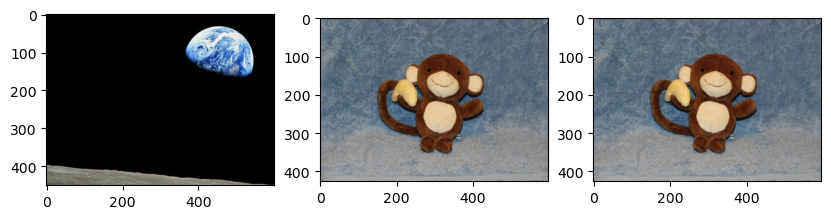

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# 读取原始图像
img_moon = io.imread('moon.jpg')
img_monkey = io.imread('monkey.jpg')

# 提取蓝色通道
b = img_monkey[:, :, 2]

# 计算 RGB 平均值
avg = np.mean(img_monkey, axis=(0, 1))

# 创建掩膜
mask = b > (avg[0] * 0.9 + avg[1] * 0.9 + avg[2] * 0.9)

# 复制猴子图像
img = img_monkey.copy()

# 将掩膜区域替换为月亮图像
h, w = img.shape[:2]
img[:h, :w][mask] = img_moon[:h, :w][mask]

# 显示图像
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img_moon)
axs[1].imshow(img_monkey)
axs[2].imshow(img)
plt.show()